In [1]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

In [2]:



# Parameters

N = 1000  # Number of wagerers
n = 250   # Number of wagers per wagerer
probabilities = np.random.uniform(0.15, 0.6, N)  # Random win rates for wagerers

# Generate data group
data = []
for i in range(N):
    win_rate = probabilities[i]
    wins = np.random.binomial(n=n, p=win_rate)
    data.append({'wagerer_id': i, 'win_rate': win_rate, 'wins': wins, 'losses': n - wins})

df = pd.DataFrame(data)

print(df.head())





   wagerer_id  win_rate  wins  losses
0           0  0.569841   129     121
1           1  0.412967   105     145
2           2  0.291199    82     168
3           3  0.534477   140     110
4           4  0.438381   102     148


In [3]:
# Why skewness?

total_wins = df['wins'].sum()
total_wagers = n * N
overall_win_rate = total_wins / total_wagers
print(f"Overall win rate: {overall_win_rate:.2%}")

Overall win rate: 38.15%


In [4]:
# Why disparity in winnings?

high_win_rate = df[df['win_rate'] > 0.5]  # Wagerers with high win rates
low_win_rate = df[df['win_rate'] < 0.2]  # Wagerers with low win rates

print(f"High win rate group size: {len(high_win_rate)}")
print(f"Low win rate group size: {len(low_win_rate)}")

High win rate group size: 248
Low win rate group size: 118


In [5]:
# Hypothesis Testing

t_stat, p_value = ttest_ind(high_win_rate['wins'], low_win_rate['wins'])
print(f"T-statistic: {t_stat}, P-value: {p_value}")

T-statistic: 86.98059188588294, P-value: 1.2238377391100837e-245


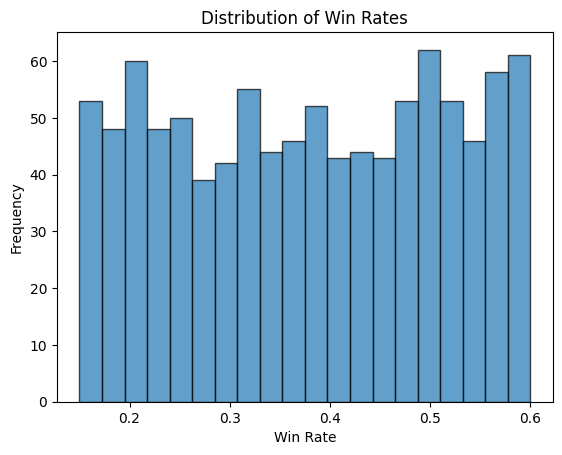

In [6]:
#Let's look at the distribution of win rates

plt.hist(df['win_rate'], bins=20, edgecolor='k', alpha=0.7)
plt.title('Distribution of Win Rates')
plt.xlabel('Win Rate')
plt.ylabel('Frequency')
plt.show()

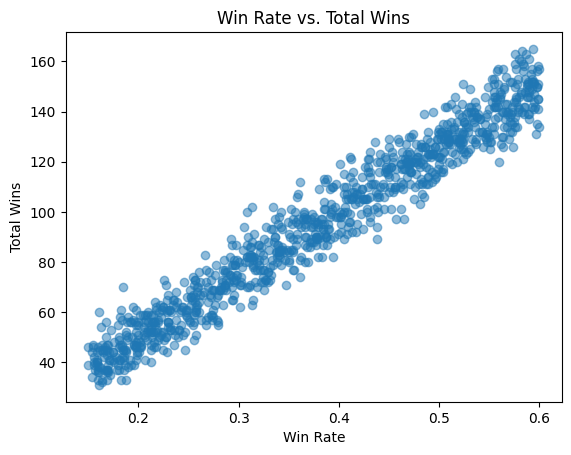

In [7]:

#Win Rate vs. Total Wins

plt.scatter(df['win_rate'], df['wins'], alpha=0.5)
plt.title('Win Rate vs. Total Wins')
plt.xlabel('Win Rate')
plt.ylabel('Total Wins')
plt.show()